In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

from random import shuffle

In [186]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1

In [187]:
data = []
labels = []
for img in os.listdir(r'C:\Users\yahal\Desktop\ancient-coins\coins'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\yahal\Desktop\ancient-coins\coins',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [188]:
cols = []
for i in range(4900):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [185]:
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_14691,pixel_14692,pixel_14693,pixel_14694,pixel_14695,pixel_14696,pixel_14697,pixel_14698,pixel_14699,label
532,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,0
2127,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,1
425,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,0
245,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,0
971,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,0
1731,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,1
763,0.062745,0.054902,0.078431,0.058824,0.05098,0.07451,0.062745,0.05098,0.078431,0.090196,...,0.07451,0.066667,0.090196,0.07451,0.066667,0.090196,1.0,0.996078,1.0,0
835,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.0,0


In [75]:
test = data.iloc[1800:]
test.reset_index(drop=True,inplace=True)

train = data.iloc[0:1800]
train.reset_index(drop=True,inplace=True)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [76]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

In [80]:

rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)

RandomForestClassifier()

In [82]:
rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)
rfc

RandomForestClassifier()

In [84]:
y_pred = rfc.predict(test_data)

In [87]:
print (classification_report(test_target,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.96      0.87       286
           1       0.94      0.72      0.81       241

    accuracy                           0.85       527
   macro avg       0.87      0.84      0.84       527
weighted avg       0.86      0.85      0.84       527



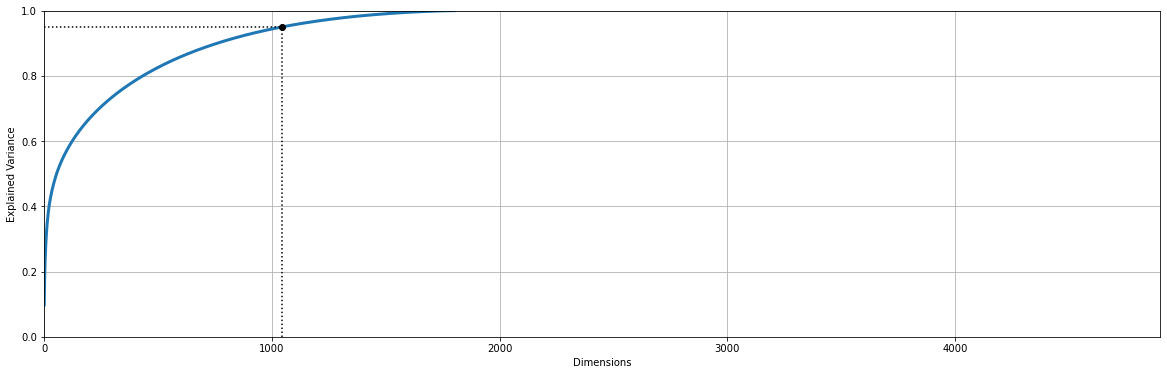

In [94]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(train_data)
cumilative_sum = np.cumsum(pca.explained_variance_ratio_)
pca_plt = plt.figure(figsize=(20,6))
pca_plt = plt.plot(cumilative_sum, linewidth=3)
pca_plt = plt.axis([0, 4900, 0, 1])
pca_plt = plt.xlabel("Dimensions")
pca_plt = plt.ylabel("Explained Variance")
x = np.argmax(cumilative_sum >= 0.95) + 1
pca_plt = plt.plot([x, x], [0, 0.95], "k:")
pca_plt = plt.plot([0, x], [0.95, 0.95], "k:")
pca_plt = plt.plot(x, 0.95, "ko")
plt.grid(True)
plt.show()


In [97]:
pca = PCA(n_components = 0.95)
pca.fit(train_data)
reduced_train = pd.DataFrame(pca.transform(train_data))
print("The total amount of dimensions: ",reduced_train.shape[1])

The total amount of dimensions:  1045


In [100]:
pca_test = PCA(n_components = 527)
pca_test.fit(test_data)
reduced_test = pd.DataFrame(pca.transform(test_data))

In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_data, train_target)
xgb_pred = xgb.predict(test_data)
print('XGBoost accuracy score: %.2f'%(xgb.score(test_data, test_target)*100),'%')

C:\Users\yahal\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 85.39 %


In [103]:
reduced_train.shape

(1800, 1045)

In [109]:
xgb.fit(reduced_train, train_target)
xgb_pred = xgb.predict(reduced_test)
print('XGBoost accuracy score: %.2f'%(xgb.score(reduced_test, test_target)*100),'%')

C:\Users\yahal\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 84.63 %


In [190]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [191]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [192]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 68, 68, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

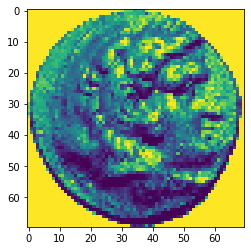

In [193]:
plt.imshow(train_data.iloc[0].values.reshape((70,70)))

In [194]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
#     img_tensor = np.expand_dims(t, axis=0)
#     img_tensor = tf.convert_to_tensor(img_tensor, dtype=tf.float32)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
#     img_tensor = np.expand_dims(t, axis=0)
#     img_tensor = tf.convert_to_tensor(img_tensor, dtype=tf.float32)
    test_data_reshaped.append(t)


In [195]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)


In [205]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [209]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

Epoch 1/18
18/18 [==============================] - 22s 1s/step - loss: 0.1836 - accuracy: 0.9294
Epoch 2/18
18/18 [==============================] - 22s 1s/step - loss: 0.1477 - accuracy: 0.9472
Epoch 3/18
18/18 [==============================] - 22s 1s/step - loss: 0.1295 - accuracy: 0.9572
Epoch 4/18
18/18 [==============================] - 22s 1s/step - loss: 0.1169 - accuracy: 0.9572
Epoch 5/18
18/18 [==============================] - 22s 1s/step - loss: 0.1215 - accuracy: 0.9561
Epoch 6/18
18/18 [==============================] - 24s 1s/step - loss: 0.0999 - accuracy: 0.9689
Epoch 7/18
18/18 [==============================] - 22s 1s/step - loss: 0.0861 - accuracy: 0.9756
Epoch 8/18
18/18 [==============================] - 22s 1s/step - loss: 0.0698 - accuracy: 0.9811
Epoch 9/18
18/18 [==============================] - 22s 1s/step - loss: 0.0561 - accuracy: 0.9867
Epoch 10/18
18/18 [==============================] - 22s 1s/step - loss: 0.0467 - accuracy: 0.9894
Epoch 11/18
18/18 [

In [210]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

17/17 - 2s - loss: 0.6357 - accuracy: 0.8956
